In [20]:
from google.colab import files
uploaded = files.upload()

Saving Customer-Churn-Prediction.csv to Customer-Churn-Prediction (1).csv


In [83]:
import pandas as pd

df = pd.read_csv('Customer-Churn-Prediction.csv')
df.head(10)   # See first few rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [84]:
df.columns           # View all column names

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [85]:
df.info()             # Check data types and nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
'''21 columns. Based on the dtypes:

    1.Categorical columns (need encoding):
        gender, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup,
        DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, Churn

    2. Numerical columns (no encoding needed):
        SeniorCitizen, tenure, MonthlyCharges

    3.Special columns:

    TotalCharges → Looks numeric but it's of type object, so we'll convert it.

    customerID → Just an identifier, can be dropped.

'''

In [86]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [87]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [88]:
df.OnlineSecurity.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [89]:
df.drop('customerID', axis=1, inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')   # errors='coerce' means if any value can't be converted to a number, turn it into NaN (missing value)

In [90]:
# Have to see if there are unique values or not

non_numeic_columns = df.select_dtypes(include=['object','bool']).columns

for col in non_numeic_columns:
    unique = df[col].unique().tolist()
    print(f"{col} :  {unique}")

gender :  ['Female', 'Male']
Partner :  ['Yes', 'No']
Dependents :  ['No', 'Yes']
PhoneService :  ['No', 'Yes']
MultipleLines :  ['No phone service', 'No', 'Yes']
InternetService :  ['DSL', 'Fiber optic', 'No']
OnlineSecurity :  ['No', 'Yes', 'No internet service']
OnlineBackup :  ['Yes', 'No', 'No internet service']
DeviceProtection :  ['No', 'Yes', 'No internet service']
TechSupport :  ['No', 'Yes', 'No internet service']
StreamingTV :  ['No', 'Yes', 'No internet service']
StreamingMovies :  ['No', 'Yes', 'No internet service']
Contract :  ['Month-to-month', 'One year', 'Two year']
PaperlessBilling :  ['Yes', 'No']
PaymentMethod :  ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
Churn :  ['No', 'Yes']


In [ ]:
# We got 10 columns with unique values

In [91]:
#  Encode Binary Categorical Columns with Label Encoding

binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
               'PaperlessBilling', 'Churn']

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})


In [93]:
# One-Hot Encoding for Multi-Class Columns

multi_class_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']     # Columns having unique values

# First, generate dummy columns for multi-class features
dummies = pd.get_dummies(df[multi_class_cols], prefix=multi_class_cols, dtype=int)

# Drop original multi-class categorical columns
df.drop(columns=multi_class_cols, inplace=True)

# Concatenate dummy columns to original DataFrame
df = pd.concat([df, dummies], axis=1)

In [94]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [96]:
df.shape

(7043, 41)

In [97]:
# Handling NaN values of 'TotalCharges' column

df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

<ipython-input-97-64493bf53d4b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [98]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   PaperlessBilling                         7043 non-null   int64  
 7   MonthlyCharges                           7043 non-null   float64
 8   TotalCharges                             7043 non-null   float64
 9   Churn                                    7043 non-null   int64  
 10  MultipleLines_No                         7043 no

In [109]:
import warnings
warnings.filterwarnings('ignore')

In [174]:
# Import all modules
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier     # Descision Tree
from sklearn.svm import SVC                             # Support vector classifier
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

In [111]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [126]:
# Splitting proccessed data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 52)

In [127]:
# LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
accuracy = lr.score(X_test,y_test)
print(f"Accuracy score of test data using LogisticRegression is {accuracy*100 : .2f}%")  # Taking upto 2 decimal

Accuracy score of test data using LogisticRegression is  81.40%


In [133]:
# Support vector classifier (SVC)

svm = SVC()
svm.fit(X_train, y_train)
accuracy = svm.score(X_test,y_test)
print(f"Accuracy score of test data using Support vector classifier is {accuracy*100 : .2f}%")

Accuracy score of test data using Support vector classifier is  73.12%


In [144]:
# RandomForestClassifier  (Descision Trees)

rf = RandomForestClassifier(n_estimators=200)   # This means the model will build 200 decision trees.
rf.fit(X_train, y_train)
accuracy = rf.score(X_test,y_test)
print(f"Accuracy score of test data using RandomForestClassifier is {accuracy*100 : .2f}%")

Accuracy score of test data using RandomForestClassifier is  79.22%


In [180]:
# Creating a Function that will directly provide me the accuracy score

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"The score of this model is {score*100 :.2f}%")
    # y_pred = model.predict(X_test)
    # print(y_pred)

In [181]:
get_score(LogisticRegression(),X_train, X_test, y_train, y_test)

The score of this model is 81.40%


In [151]:
get_score(SVC(),X_train, X_test, y_train, y_test)

The score of this model is 73.12%


In [153]:
get_score(RandomForestClassifier(n_estimators=50),X_train, X_test, y_train, y_test)

The score of this model is 78.56%


In [148]:
# Applying KFold

kf = KFold(n_splits=5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [165]:
# Cross Validations (In different Algorithms):

print('Here I will get all the cross validation scores in an array and see the accuracy score. Each number is the accuracy score for one fold')
print()
cross_val_score(LogisticRegression(), X, y, cv=kf)  # Here cv=kf means I am keeping KFold as my cross validation

Here I will get all the cross validation scores in an array and see the accuracy score. Each number is the accuracy score for one fold



array([0.80198722, 0.81263307, 0.79418027, 0.80539773, 0.80326705])

In [167]:
cross_val_score(SVC(), X, y ,cv=kf)

array([0.73527324, 0.74166075, 0.73740241, 0.72869318, 0.73011364])

In [168]:
cross_val_score(RandomForestClassifier(n_estimators=50), X, y, cv=kf)

array([0.79630944, 0.78566359, 0.7707594 , 0.78977273, 0.79971591])

In [154]:
# Applying StratifiedKFold

fold = StratifiedKFold()
fold

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [171]:
# Cross Validation (StratifiedKFold) in different Algorithms

# Putting Stratified K Fold in cv which I have saved as fold previously

cross_val_score(LogisticRegression(), X, y, cv=fold)  # Here cv=fold means I am keeping StratifiedKFold as my cross validation

array([0.8012775 , 0.8105039 , 0.78779276, 0.81392045, 0.80539773])

In [172]:
cross_val_score(SVC(), X, y ,cv=fold)

array([0.73456352, 0.73456352, 0.73456352, 0.73508523, 0.734375  ])

In [173]:
cross_val_score(RandomForestClassifier(n_estimators=50), X, y, cv=fold)

array([0.79488999, 0.79488999, 0.76933996, 0.79190341, 0.79261364])

In [186]:
y_pred = lr.predict(X_test)  # Here I'm choosing LogisticRegression's  to predict y

print(y_pred)



[1 0 0 ... 0 0 0]


In [187]:
# Creating confussion Matrix
#Then Create heatMap

cm = confusion_matrix(y_test, y_pred)
cm

array([[1389,  156],
       [ 237,  331]])

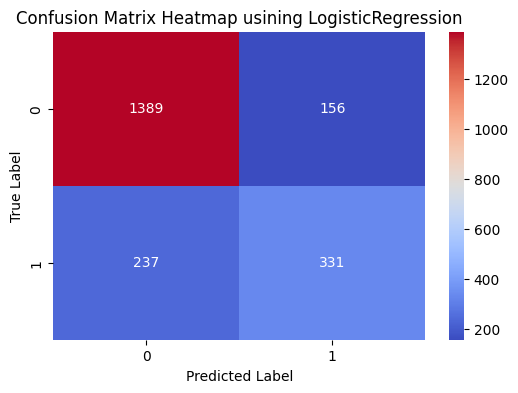

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')  #fmt = 'd' = decimal integer format (Letting to show all integer values)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap usining LogisticRegression')
plt.show()

📌 Insights:
✅ Model is good at identifying customers who won't churn (1389 correct predictions).

❌ It misses many customers who will churn (237 false negatives).

⚠️ Precision is better than recall: So when the model says "churn", it’s often correct — but it misses some churners.

Use Case Implication: In a churn prevention scenario, recall is important — you want to catch as many churners as possible, even if it means a few false positives.

So improving recall may be more important than just increasing accuracy.

📌 মূল বক্তব্য (Insights):
✅ মডেলটি ভালোভাবে অনুমান করতে পারছে যে কোন কাস্টমাররা কোম্পানি ছাড়বে না

মোট ১৩৮৯ জন কাস্টমারকে ঠিকঠাকভাবে "চার্ন করবে না" বলে শনাক্ত করতে পেরেছে।

মানে যারা থাকবে, তাদের মডেল ভালোভাবে চিনতে পারছে।

❌ কিন্তু অনেক চর্ন করা কাস্টমারকে মডেল শনাক্ত করতে পারেনি

২৩৭ জন কাস্টমার আসলে চর্ন করেছে, কিন্তু মডেল বলেছে তারা করবে না (এগুলোকে বলা হয় False Negatives)।

⚠️ Precision রেট Recall-এর চেয়ে ভালো

মানে হলো, যখনই মডেল বলে যে “এই কাস্টমার চর্ন করবে,” সেটা বেশিরভাগ সময়েই সঠিক হয়।

কিন্তু মডেল অনেক কাস্টমারকে ধরতেই পারছে না যারা আসলেই চর্ন করবে (Recall কম)।

📌 ব্যবহারিক প্রভাব (Use Case Implication):
👉 যদি তোমার লক্ষ্য হয় চর্ন প্রতিরোধ করা (Churn Prevention), তাহলে Recall বেশি গুরুত্বপূর্ণ।

কারণ তুমি চাও যত বেশি সম্ভব চর্ন করা কাস্টমারকে আগেই শনাক্ত করতে, যাতে ব্যবস্থা নিতে পারো।

💡 এর মানে, শুধু Accuracy বাড়ানোর চাইতে Recall বাড়ানো বেশি জরুরি —

যেন তুমি যতটা সম্ভব বেশি সংখ্যক "চর্ন করবে এমন" কাস্টমারকে চিনে ফেলতে পারো, কিছু ভুল হলেও সমস্যা নেই।

In [197]:
# Now I can check the same things applying different models (with / without cv)